In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir('C:\\Users\\Administrator\\Desktop\\ml_ipynb\\ex7')
	print(os.getcwd())
except:
    print(os.getcwd()+" not changed!!!")


C:\Users\Administrator\Desktop\ml_ipynb\ex7


In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from helper import kmeans as km



 # kmeans算法实现

 ## 1 加载数据和查看数据

         X1        X2
0  1.842080  4.607572
1  5.658583  4.799964
2  6.352579  3.290854
3  2.904017  4.612204
4  3.231979  4.939894


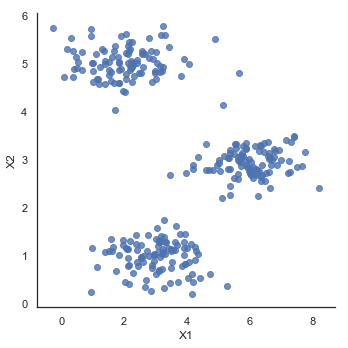

In [3]:
mat = sio.loadmat('./data/ex7data2.mat')
data2 = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
print(data2.head())

sns.set(context="notebook", style="white")
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)



 ## 2 随机初始化
 随机选择几个中心点,然后画出图像

In [4]:
init_centroids  = km.random_init(data2, 3)



..\helper\kmeans.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return data.sample(k).as_matrix()


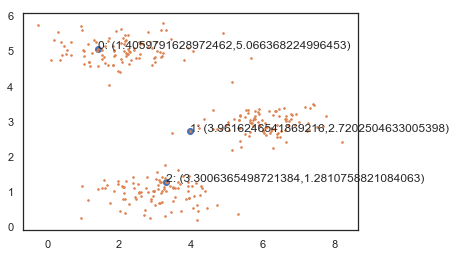

In [5]:
x = np.array([1, 1])
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=init_centroids[:, 0], y=init_centroids[:, 1])

for i, node in enumerate(init_centroids):
    ax.annotate('{}: ({},{})'.format(i, node[0], node[1]), node)
ax.scatter(data2['X1'], data2['X2'], marker='.', s=10)



 ## 3 运行一次中心聚类,看看数据
 并且画出图像看看

In [6]:
# 寻找下标
C = km.assign_cluster(data2, init_centroids)
data_with_c = km.combine_data_C(data2, C)
data_with_c.head()


..\helper\kmeans.py:66: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix())


,X1,X2,C
0,1.842080,4.607572,0
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,0
4,3.231979,4.939894,0


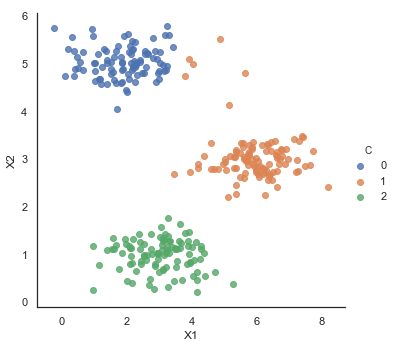

In [7]:
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)



 ## 4 寻找新的中心点
 并且看看画出来的效果

..\helper\kmeans.py:81: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  drop('C', axis=1).\
..\helper\kmeans.py:66: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix())


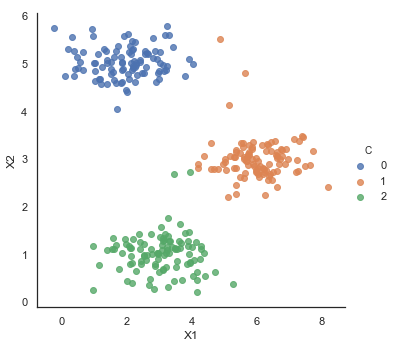

In [8]:
# 根据当前下标寻找中心点,这个方法运行多次就可以看出一次次的变化
new_centorids = km.new_centroids(data2, C)
# 形成新的下标
C = km.assign_cluster(data2, new_centorids)
data_with_c = km.combine_data_C(data2, C)
#data_with_c.head()
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)




In [9]:
# ## 5 整个流程一起实现


..\helper\kmeans.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return data.sample(k).as_matrix()
..\helper\kmeans.py:81: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  drop('C', axis=1).\
..\helper\kmeans.py:98: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix() - expand_C_with_centroids)
..\helper\kmeans.py:66: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix())
..\helper\kmeans.py:81: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  drop('C', axis=1).\
..\helper\kmeans.py:98: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix() - expand_C_with_centroids)
..\helper\kmeans.py:66: FutureWarning: Method .as_matrix will be removed in a future version. Use .values 

running epoch 0
running epoch 1
running epoch 2
running epoch 3


0.794176363371587


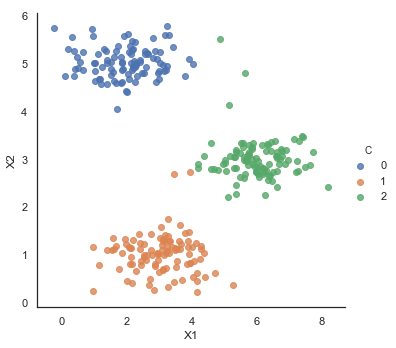

In [9]:
# 注意,这里有可能效果不好,多运行几次把
final_C, final_centroid, _= km._k_means_iter(data2, 3)
data_with_c = km.combine_data_C(data2, final_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
print(km.cost(data2, final_centroid, final_C))


 ## 6多次随机初始化
 经过第5步,我们知道,最后运行出来的不一定是最优的
 所以我们可以把多次随机初始化和运行放到一起,一次性解决

..\helper\kmeans.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return data.sample(k).as_matrix()
..\helper\kmeans.py:66: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix())
..\helper\kmeans.py:81: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  drop('C', axis=1).\
..\helper\kmeans.py:98: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix() - expand_C_with_centroids)
..\helper\kmeans.py:66: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_matrix())
..\helper\kmeans.py:81: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  drop('C', axis=1).\
..\helper\kmeans.py:98: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  arr=data.as_mat

running epoch 0
running epoch 1
running epoch 2
running epoch 0
running epoch 1
running epoch 2
running epoch 3


running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5


running epoch 6
running epoch 7
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4


running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2


running epoch 3
running epoch 4
running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 0


running epoch 1
running epoch 2
running epoch 3
running epoch 0
running epoch 1
running epoch 2
running epoch 3


running epoch 0
running epoch 1
running epoch 2
running epoch 3
running epoch 4
running epoch 5
running epoch 6


running epoch 7
running epoch 8
0.794176363371587


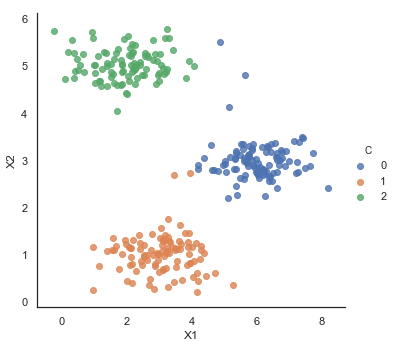

In [10]:
# 可以看到,效果不错
best_C, best_centroids, least_cost = km.k_means(data2, 3)
print(least_cost)
data_with_c = km.combine_data_C(data2, best_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)




 ## 7 尝试使用sklearn

In [11]:
from sklearn.cluster import KMeans



In [12]:
sk_kmeans = KMeans(n_clusters=3)
sk_kmeans.fit(data2)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

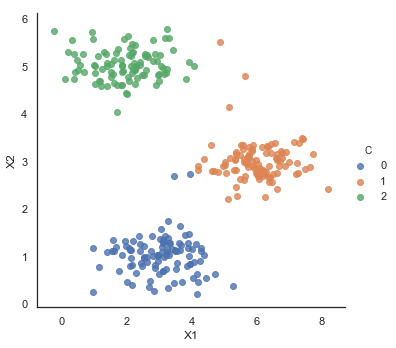

In [13]:
sk_C = sk_kmeans.predict(data2)
data_with_c = km.combine_data_C(data2, sk_C)
sns.lmplot('X1', 'X2', hue='C', data=data_with_c, fit_reg=False)
